In [147]:
from matplotlib import pyplot as plt
from numpy.linalg import multi_dot

In [148]:
!pip install colorama

In [149]:
import random
import pprint
import io
import numpy as np
import sys
from gym.envs.toy_text import discrete
from colorama import Fore, Back, Style

UP = 0
RIGHT = 1
DOWN = 2
LEFT = 3

class GridworldEnv(discrete.DiscreteEnv):
  metadata = {'render.modes': ['human', 'ansi']}

  def __init__(self, shape=[10,10]):
    if not isinstance(shape, (list, tuple)) or not len(shape) == 2:
        raise ValueError('shape argument must be a list/tuple of length 2')
        
    self.shape = shape

    nS = np.prod(shape)
    nA = 4

    MAX_Y = shape[0]
    MAX_X = shape[1]

    P = {}
    grid = np.arange(nS).reshape(shape)
    it = np.nditer(grid, flags=['multi_index'])

    while not it.finished:
      s = it.iterindex
      y, x = it.multi_index

      # P[s][a] = (prob, next_state, reward, is_done)
      P[s] = {a : [] for a in range(nA)}

      #Reaching target
      is_done = lambda s: s == 0

      #Due to existance of walls, these moves are not available
      no_up = lambda s: s in [44,45,63,64]
      no_down = lambda s: s in [23,24,25,44]
      no_left = lambda s: s in [44,36,55]
      no_right = lambda s: s in [32,42,52]

      #Barries in the path
      pit = lambda s: s in [13,62,41]
      wall = lambda s: s in [43,33,53,34,35,54]

      #Rewards of each state
      reward = 1.0 if is_done(s) else 0.0
      reward = -10.0 if pit(s) else reward
      
      ns_up = s if y == 0 else s - MAX_X
      ns_right = s if x == (MAX_X - 1) else s + 1
      ns_down = s if y == (MAX_Y - 1) else s + MAX_X
      ns_left = s if x == 0 else s - 1
      
      P[s][UP] = [(1, ns_up, reward, is_done(ns_up))]
      P[s][RIGHT] = [(1.0, ns_right, reward, is_done(ns_right))]
      P[s][DOWN] = [(1, ns_down, reward, is_done(ns_down))]
      P[s][LEFT] = [(1, ns_left, reward, is_done(ns_left))]

      #Terminal state
      if is_done(s):
        P[s][UP] = [(1.0, s, reward, True)]
        P[s][RIGHT] = [(1.0, s, reward, True)]
        P[s][DOWN] = [(1.0, s, reward, True)]
        P[s][LEFT] = [(1.0, s, reward, True)]

      #Encountering walls
      if no_up(s):
        P[s][UP] = [(1.0, s, -3.0 , False)]                
      if no_down(s):
        P[s][DOWN] = [(1.0, s, -3.0 , False)]                
      if no_right(s):
        P[s][RIGHT] = [(1.0, s, -3.0 , False)]  
      if no_left(s):
        P[s][LEFT] = [(1.0, s, -3.0 , False)] 

      it.iternext() 

    # Initial state distribution is uniform
    isd = np.zeros(100)
    isd[44]=1
    self.P = P

    super(GridworldEnv, self).__init__(nS, nA, P, isd)

  def _render(self, mode='human', close=False):
    if close:
      return

    outfile = io.StringIO() if mode == 'ansi' else sys.stdout

    grid = np.arange(self.nS).reshape(self.shape)
    it = np.nditer(grid, flags=['multi_index'])

    while not it.finished:
      s = it.iterindex
      y, x = it.multi_index

      if self.s == s and not s==0:
        output =  Back.CYAN + Style.BRIGHT + Fore.WHITE +  "  웃 " + Style.RESET_ALL if s not in [13,62,41] else Back.BLUE + Style.BRIGHT + Fore.WHITE + "  웃 " + Style.RESET_ALL
      elif s == 0:
          output = Back.GREEN + Style.BRIGHT + Fore.WHITE + "     " + Style.RESET_ALL if not self.s==0 else Back.GREEN + Style.BRIGHT + Fore.WHITE +  "  웃 " + Style.RESET_ALL
      elif s in [13,62,41]:
          output = Back.BLUE + "     " + Style.RESET_ALL
      elif s in [43,33,53,34,35,54]:
          output = Back.CYAN + Style.BRIGHT + Fore.BLACK +   "  █  "  + Style.RESET_ALL
      else:
          output = Back.CYAN + Style.BRIGHT + Fore.BLACK +  "  .  " + Style.RESET_ALL

      if x == 0:
          output = output.lstrip()
      if x == self.shape[1] - 1:
          output = output.rstrip()

      outfile.write(output)

      if x == self.shape[1] - 1:
          outfile.write("\n")

      it.iternext()

In [150]:
import random
import pprint
import io
import numpy as np
import sys
from gym.envs.toy_text import discrete
from colorama import Fore, Back, Style

UP = 0
RIGHT = 1
DOWN = 2
LEFT = 3

class GridworldEnvRevised(discrete.DiscreteEnv):
  metadata = {'render.modes': ['human', 'ansi']}

  def __init__(self, shape=[10,10]):
    if not isinstance(shape, (list, tuple)) or not len(shape) == 2:
        raise ValueError('shape argument must be a list/tuple of length 2')
        
    self.shape = shape

    nS = np.prod(shape)
    nA = 4

    MAX_Y = shape[0]
    MAX_X = shape[1]

    P = {}
    grid = np.arange(nS).reshape(shape)
    it = np.nditer(grid, flags=['multi_index'])

    while not it.finished:
      s = it.iterindex
      y, x = it.multi_index

      # P[s][a] = (prob, next_state, reward, is_done)
      P[s] = {a : [] for a in range(nA)}

      #Reaching target
      is_done = lambda s: s == 0

      #Due to existance of walls, these moves are not available
      no_up = lambda s: s in [44,45,63,64]
      no_down = lambda s: s in [23,24,25,44]
      no_left = lambda s: s in [44,36,55]
      no_right = lambda s: s in [32,42,52]

      #Barries in the path
      pit = lambda s: s in [13,62,41]
      wall = lambda s: s in [43,33,53,34,35,54]

      #Rewards of each state
      reward = 1.0 if is_done(s) else -1.0
      reward = -10.0 if pit(s) else reward
      
      ns_up = s if y == 0 else s - MAX_X
      ns_right = s if x == (MAX_X - 1) else s + 1
      ns_down = s if y == (MAX_Y - 1) else s + MAX_X
      ns_left = s if x == 0 else s - 1
      
      P[s][UP] = [(1, ns_up, reward, is_done(ns_up))]
      P[s][RIGHT] = [(1.0, ns_right, reward, is_done(ns_right))]
      P[s][DOWN] = [(1, ns_down, reward, is_done(ns_down))]
      P[s][LEFT] = [(1, ns_left, reward, is_done(ns_left))]

      #Terminal state
      if is_done(s):
        P[s][UP] = [(1.0, s, reward, True)]
        P[s][RIGHT] = [(1.0, s, reward, True)]
        P[s][DOWN] = [(1.0, s, reward, True)]
        P[s][LEFT] = [(1.0, s, reward, True)]

      #Encountering walls
      if no_up(s):
        P[s][UP] = [(1.0, s, -3.0 , False)]                
      if no_down(s):
        P[s][DOWN] = [(1.0, s, -3.0 , False)]                
      if no_right(s):
        P[s][RIGHT] = [(1.0, s, -3.0 , False)]  
      if no_left(s):
        P[s][LEFT] = [(1.0, s, -3.0 , False)] 

      it.iternext() 

    # Initial state distribution is uniform
    isd = np.zeros(100)
    isd[44]=1
    self.P = P

    super(GridworldEnvRevised, self).__init__(nS, nA, P, isd)

  def _render(self, mode='human', close=False):
    if close:
      return

    outfile = io.StringIO() if mode == 'ansi' else sys.stdout

    grid = np.arange(self.nS).reshape(self.shape)
    it = np.nditer(grid, flags=['multi_index'])

    while not it.finished:
      s = it.iterindex
      y, x = it.multi_index

      if self.s == s and not s==0:
        output =  Back.CYAN + Style.BRIGHT + Fore.WHITE +  "  웃 " + Style.RESET_ALL if s not in [13,62,41] else Back.BLUE + Style.BRIGHT + Fore.WHITE + "  웃 " + Style.RESET_ALL
      elif s == 0:
          output = Back.GREEN + Style.BRIGHT + Fore.WHITE + "     " + Style.RESET_ALL if not self.s==0 else Back.GREEN + Style.BRIGHT + Fore.WHITE +  "  웃 " + Style.RESET_ALL
      elif s in [13,62,41]:
          output = Back.BLUE + "     " + Style.RESET_ALL
      elif s in [43,33,53,34,35,54]:
          output = Back.CYAN + Style.BRIGHT + Fore.BLACK +   "  █  "  + Style.RESET_ALL
      else:
          output = Back.CYAN + Style.BRIGHT + Fore.BLACK +  "  .  " + Style.RESET_ALL

      if x == 0:
          output = output.lstrip()
      if x == self.shape[1] - 1:
          output = output.rstrip()

      outfile.write(output)

      if x == self.shape[1] - 1:
          outfile.write("\n")

      it.iternext()

In [151]:
class Double_Q_learning():
    def __init__ ( self , dscnt_fctr , n_episodes ,  epsilon , alpha , env , decaying = True ):
        self.epsilon =epsilon
        self.nS = env.nS
        self.nA = env.nA
        self.env = env
        self.Q1 = np.zeros((self.nS , self.nA))
        self.Q2 = np.zeros((self.nS , self.nA))
        self.decaying = True
        self.alpha =alpha
        self.n_episodes = n_episodes
        self.reward_per_episode = []
        self.dscnt_fctr = dscnt_fctr

    def decay( self ):
        self.alpha -= 1/(self.n_episodes+1)
        self.epsilon = (self.epsilon/(self.n_episodes+1))*(self.n_episodes-10)
    
    def e_greedy_choose( self , state ):
        temp = self.Q1[ state , : ] + self.Q2[ state , : ] 
        best = np.argmax(temp)
        probs = (np.ones(self.nA)/self.nA)*self.epsilon
        probs[ best ] += 1 - self.epsilon
        return np.random.choice( self.nA , 1 , p = probs )[0]

    def run(self):
        for eps in range(self.n_episodes):
            self.env.reset()
            done = False
            state = 44
            reward_sum = 0
            i = 0
            while not done:
                action = self.e_greedy_choose( state )
                state_prim, reward, done, info = self.env.step(action)
                reward_sum += reward
                prob = np.random.uniform( 0 , 1 )
                if prob > 0.5 :
                    self.Q1[ state , action ] += self.alpha*( reward + self.dscnt_fctr*self.Q2[ state_prim , np.argmax( self.Q1[ state_prim , : ] ) ] - self.Q1[ state , action ] )
                else:
                    self.Q2[ state , action ] += self.alpha*( reward + self.dscnt_fctr*self.Q1[ state_prim , np.argmax( self.Q2[ state_prim , : ] ) ] - self.Q2[ state , action ] )
                state = state_prim
                i += 1
                if done or i ==1000 :
                    action = self.e_greedy_choose( state )
                    state_prim, reward, done, info = self.env.step(action)
                    reward_sum += reward
                    prob = np.random.uniform( 0 , 1 )
                    if prob > 0.5 :
                        self.Q1[ state , action ] += self.alpha*( reward + self.dscnt_fctr*self.Q2[ state_prim , np.argmax( self.Q1[ state_prim , : ] ) ] - self.Q1[ state , action ] )
                    else:
                        self.Q2[ state , action ] += self.alpha*( reward + self.dscnt_fctr*self.Q1[ state_prim , np.argmax( self.Q2[ state_prim , : ] ) ] - self.Q2[ state , action ] )
                    state = state_prim
                    self.reward_per_episode.append(reward_sum)
                    break
            if self.decaying :
                self.decay()

In [152]:
class SARSA():
    def __init__ ( self , dscnt_fctr , n_episodes ,  epsilon , alpha , env , decaying = True ):
        self.epsilon =epsilon
        self.nS = env.nS
        self.nA = env.nA
        self.env = env
        self.Q1 = np.zeros((self.nS , self.nA))
        self.decaying = True
        self.alpha =alpha
        self.n_episodes = n_episodes
        self.reward_per_episode = []
        self.dscnt_fctr = dscnt_fctr
        self.episode_lengths = []

    def decay( self ):
        self.alpha -= 1/(self.n_episodes+1)
    
    def e_greedy_choose( self , state ):
        temp = self.Q1[ state , : ]
        best = np.argmax(temp)
        probs = (np.ones( self.nA)/self.nA)*self.epsilon
        probs[ best ] += 1 - self.epsilon
        return np.random.choice( self.nA , 1 , p = probs )[0]

    def run(self):
        for eps in range(self.n_episodes):
            self.env.reset()
            done = False
            state = 44
            reward_sum = 0
            action = self.e_greedy_choose( state )
            episode_length = 0 
            while not done:
                state_prim, reward, done, info = self.env.step(action)
                reward_sum += reward
                action_prim = self.e_greedy_choose( state_prim )
                self.Q1[ state , action ] += self.alpha*( reward + self.dscnt_fctr*self.Q1[ state_prim , action_prim] - self.Q1[ state , action ] )
                state = state_prim
                action = action_prim
                episode_length += 1
                if done :
                    state_prim, reward, done, info = self.env.step(action)
                    reward_sum += reward
                    action_prim = self.e_greedy_choose( state_prim )
                    self.Q1[ state , action ] += self.alpha*( reward + self.dscnt_fctr*self.Q1[ state_prim , action_prim] - self.Q1[ state , action ] )
                    state = state_prim
                    action = action_prim
                    episode_length += 1
                    self.episode_lengths.append( episode_length )
                    self.reward_per_episode.append(reward_sum)
                    break
            if self.decaying :
                self.decay()

In [153]:
class n_step_expected_SARSA():
    def __init__ ( self , epsilon , dscnt_fctr , n_episodes ,  n , alpha , env , decaying = True ):
        self.nS = env.nS
        self.nA = env.nA
        self.epsilon = epsilon
        self.n = n
        self.env = env
        self.Q = np.zeros((self.nS , self.nA))
        self.decaying = True
        self.alpha =alpha
        self.n_episodes = n_episodes
        self.reward_per_episode = []
        self.dscnt_fctr = dscnt_fctr
        self.episode_lengths = []
        self.policy = np.zeros((self.nS,self.nA))

    def e_greedy_choose( self , state ):
        temp = self.Q[ state , : ]
        best = np.argmax(temp)
        self.policy[ state , : ] = (np.ones(self.nA)/self.nA)*self.epsilon
        self.policy[ state , best ] += 1 - self.epsilon
        return np.random.choice( self.nA , 1 , p = self.policy[ state , : ] )[0]

    def update_policy( self ):
        for i in range(self.nS):
            _ = self.e_greedy_choose( i )

    def decay( self ):
        self.alpha -= 1/(self.n_episodes+1)
    
    def return_value( self , state ):
        temp = 0
        for i in range( self.nA ):
            temp += self.policy[ state , i ]*self.Q[ state , i ] 
        return temp

    def run( self ):
        for _ in range( self.n_episodes ):
            self.env.reset()
            action = []
            rewards = [0]
            states = [0]
            action.append( self.e_greedy_choose( 44 ) )
            T = np.inf
            t = 0
            tau=0
            i = 0 
            if self.decaying :
                self.decay()
            while True :
                
                if t<T :
                    state_prim, reward, done, info = self.env.step(action[-1])
                    states.append(state_prim)
                    rewards.append(reward)
                    if done :
                        state_prim, reward, done, info = self.env.step(action[-1])
                        rewards.append(reward)
                        self.reward_per_episode.append( np.sum( rewards ) )
                        T = t + 1
                    else:
                        action.append( self.e_greedy_choose( state_prim ) )
                tau = t + 1 - self.n
                i += 1
                if tau >= 0 :
                    G = 0
                    for i in np.arange( tau+1 , min( tau + self.n , T ) + 1 ):
                        G += ( self.dscnt_fctr**( i - tau - 1 ) )*rewards[ i ]
                    if tau+self.n >=len(states):
                        G += self.return_value( states[ tau + self.n-1 ])
                    else:
                        G += self.return_value( states[ tau + self.n ])
                    if tau + self.n < T :
                        G += (self.dscnt_fctr**self.n)*self.Q[ states[ tau + self.n ] , action[ tau + self.n ] ]
                    self.Q[ states[ tau ] , action[ tau ] ] += self.alpha*( G - self.Q[ states[ tau ] , action[ tau ] ] )
                    self.update_policy()
                #self.reward_per_episode.append( np.sum( rewards ) )
                if tau == T-1 or i == 200 :
                    break
                t += 1

In [154]:
class Tree_backup():
    def __init__ ( self , epsilon , dscnt_fctr , n_episodes ,  n , alpha , env , decaying = True ):
        self.nS = env.nS
        self.nA = env.nA
        self.epsilon = epsilon
        self.n = n
        self.env = env
        self.Q = np.zeros((self.nS , self.nA))
        self.decaying = True
        self.alpha =alpha
        self.n_episodes = n_episodes
        self.reward_per_episode = []
        self.dscnt_fctr = dscnt_fctr
        self.episode_lengths = []
        self.policy = np.ones((self.nS,self.nA))/self.nA

    def update_policy( self ):
        max_arg = np.argmax( self.Q , axis = 1 )
        for i in range( self.policy.shape[0]):
            temp = self.Q[ i , : ]
            best = np.argmax(temp)
            self.policy[ i , : ] = (np.ones(self.nA)/self.nA)*self.epsilon
            self.policy[ i , best ] += 1 - self.epsilon

    def choose_action( self , state ):
        #print(self.policy[ state , : ])
        try:
            return np.random.choice( self.nA , 1 , p = self.policy[ state , : ] )[0]
        except:
            print( self.policy[ state , : ] )

    def update_e(self):
        self.epsilon -= 1/(2*self.n_episodes)
    
    def run( self ):
        for _ in range( self.n_episodes ):
            self.env.reset()
            action = []
            rewards = [0]
            states = [0]
            action.append( self.choose_action( 44 ))
            T = np.inf
            t = 0
            i=0
            self.update_e()
            while True :
                if t<T :
                    state_prim, reward, done, info = self.env.step(action[-1])
                    #self.reward_per_episode.append( np.sum( rewards ) )
                    states.append(state_prim)
                    rewards.append(reward)
                    if done :
                        _, reward, done, info = self.env.step(action[-1])
                        rewards.append(reward)
                        #self.reward_per_episode.append( np.sum( rewards ) )
                        self.reward_per_episode.append( np.sum( rewards ) )
                        T = t + 1
                        break
                    else:
                        action.append( self.choose_action( states[ -1 ] ) )
                tau = t + 1 - self.n
                
                if tau >= 0 :
                    if t + 1 >= T :
                        G = rewards[ T ]
                    else:
                        G = rewards[ t + 1 ]
                        for a in range(self.nA):
                            G += self.dscnt_fctr*self.policy[ states[ t+1 ] , a ]*self.Q[ states[ t+1 ] , a ] 
                    if T == np.inf:
                        k= int(t)
                    else: 
                        k = np.min( int(t) , int(T-1 ))
                    while k == tau + 1 :
                        best_ac = action[ k ]
                        exception_sum = 0
                        for a in range(self.nA):
                            if a != best_ac:
                                exception_sum += self.dscnt_fctr*self.policy[ states[ k ] , a ]*self.Q[ states[ k ] , a ]
                        G = rewards[ k ] + self.dscnt_fctr*( exception_sum + self.policy[ states[ k ] , best_ac ]*G)
                        k = k - 1
                    self.Q[ states[ tau ] , action[ tau ] ] += self.alpha*( G - self.Q[ states[ tau ] , action[ tau ] ] )
                    self.update_policy()
                #self.reward_per_episode.append( np.sum( rewards ) )
                i += 1
                if tau == T-1 or i == 1000:
                    self.reward_per_episode.append( np.sum( rewards ) )
                    break
                t += 1

In [155]:
class Mc_on_policy():
    def __init__ ( self , nS , nA , epsilon , decaying = True):
         self.nA = nA
         self.nS = nS
         self.epsilon = epsilon
         self.policy = np.ones(( nS , nA ))/self.nA
         self.Q = np.zeros(( nS , nA ))
         self.returns = np.zeros(( nS , nA , 2 )) # first is for count of coincedences were is this state and
                                                                      #action, second is averaged return up to current moment.
         self.episode_s = []
         self.episode_a = []
         self.episode_r = []
         self.all_returns = []
         self.e_dev = []
         self.i = []

    def update_returns( self , s , a , r ):
        temp = self.returns[ s , a , : ]
        t = temp[0]
        new_avg = ( t*temp[1] + r )/( t + 1 )
        t += 1
        self.returns[ s , a , : ] = np.array([ t , new_avg ])
        return new_avg

    def update_policy( self , state , best_action ):
        self.policy[ state , : ] = np.ones(( 1 , self.nA ))*( self.epsilon/self.nA )
        self.policy[ state , best_action ] += 1 - self.epsilon

    def find_best_action( self , state ):
        temp = self.Q[ state , : ]
        return np.argmax( temp )

    def choose_action( self , state ):
        #print(self.policy[ state , : ])
        return np.random.choice( self.nA , 1 , p = self.policy[ state , : ] )[0]

    def gen_episode( self , env , eps ):
        self.episode_s = []
        self.episode_r = []
        self.episode_a = []
        done = 0 
        i = 0
        env.reset()
        action =  self.choose_action( 44 )
        while not done : 
            if i != 0 :
                action  = self.choose_action( state )
            state, reward, done, info = env.step(action)
            self.episode_s.append(state)
            self.episode_r.append(reward)
            self.episode_a.append(action)
            i += 1

            if done or i == 200  :
                action  = self.choose_action( state )
                state, reward, done, info = env.step(action)
                self.episode_s.append(state)
                self.episode_r.append(reward)
                self.episode_a.append(action)
                done = 0
                break
        self.i.append(i)

    def update_eps( self , episode ):
        self.epsilon -= 1/(episode+1)

    def run( self , n_episode , discount_factor , env ):
        for eps in range(n_episode):
            self.gen_episode( env , eps )
            G = 0
            rng = np.flip( np.arange(len(self.episode_a)) )
            self.update_eps( n_episode )
            self.e_dev.append(self.epsilon)
            self.all_returns.append( np.sum(self.episode_r) )
            #print(self.policy)
            for i in rng :
                G = discount_factor*G + self.episode_r[i]
                if (self.episode_s[i] , self.episode_a[i]) not in zip( self.episode_s[ i+1: ] , self.episode_a[ i+1: ] ):
                    self.Q[ self.episode_s[i] , self.episode_a[i] ] = self.update_returns( self.episode_s[i] , self.episode_a[i] , G )
                    best = self.find_best_action( self.episode_s[i] )
                    self.update_policy( self.episode_s[i] , best )

In [156]:
class Mc_off_policy():
    def __init__ ( self , policy , nS , nA , epsilon , decaying = True):
         self.nA = nA
         self.nS = nS
         self.epsilon = epsilon
         self.policy = policy
         self.Q = np.zeros(( nS , nA ))
         self.returns = np.zeros(( nS , nA )) # first is for count of coincedences were is this state and
                                                                      #action, second is averaged return up to current moment.
         self.episode_s = []
         self.episode_a = []
         self.episode_r = []
         self.all_returns = []
         self.e_dev = []
         self.i = []
         self.c = np.zeros(( nS , nA ))
         self.b = np.zeros(( nS , nA ))

    def update_returns( self , s , a , w , G ):
        self.Q[s , a] += ( w/self.c[s,a] )*(G-self.Q[s,a])

    def update_policy( self , state , best_action ):
        self.policy[ state , : ] = np.ones(( 1 , self.nA ))*( self.epsilon/self.nA )
        self.policy[ state , best_action ] += 1 - self.epsilon

    def find_best_action( self , state ):
        temp = self.Q[ state , : ]
        return np.argmax( temp )

    def choose_action( self , state ):
        #print(self.policy[ state , : ])
        try:
            return np.random.choice( self.nA , 1 , p = self.b[ state , : ] )[0]
        except:
            print( self.b[ state , : ] )

    def gen_episode( self , env , eps ):
        self.episode_s = []
        self.episode_r = []
        self.episode_a = []
        done = 0 
        i = 0
        env.reset()
        action =  self.choose_action( 44 )
        while not done : 
            if i != 0 :
                action  = self.choose_action( state )
            try:
                state, reward, done, info = env.step(action)
            except:
                print(action)
            self.episode_s.append(state)
            self.episode_r.append(reward)
            self.episode_a.append(action)
            i += 1
            if done or i == 250 :
                action  = self.choose_action( state )
                state, reward, done, info = env.step(action)
                self.episode_s.append(state)
                self.episode_r.append(reward)
                self.episode_a.append(action)
                done = 0
                break
        self.i.append(i)

    def update_eps( self , episode ):
        self.epsilon -= 1/(episode+1)

    def update_c(self, s , a , w ):
        self.c[s,a] += w

    def update_w( self , w , s , a ):
        return w*(self.policy[s,a]/self.b[s,a])

    def gen_b(self):
        for i in range( self.policy.shape[0]):
            temp = self.Q[ i , : ]
            best = np.argmax(temp)
            self.b[ i , : ] = (np.ones(self.nA)/self.nA)*self.epsilon
            self.b[ i , best ] += 1 - self.epsilon

    def run( self , n_episode , discount_factor , env ):
        for eps in range(n_episode):
            self.gen_b()
            self.gen_episode( env , eps )
            G = 0
            W = 1
            rng = np.flip( np.arange(len(self.episode_a)) )
            self.update_eps( n_episode )
            self.e_dev.append(self.epsilon)
            self.all_returns.append( np.sum(self.episode_r) )
            #print(self.policy)
            for i in rng :
                G = discount_factor*G + self.episode_r[i]
                self.update_c( self.episode_s[i] , self.episode_a[i] , W )
                self.update_returns( self.episode_s[i] , self.episode_a[i] , W , G )
                W = self.update_w( W , self.episode_s[i] , self.episode_a[i] )

In [157]:
env =  GridworldEnv()
env_new = GridworldEnvRevised()

In [120]:
dq = Double_Q_learning( 0.9 , 1500 ,  0.05 , 1 , env , decaying = True  )
dq.run()

In [160]:
dq_2 = Double_Q_learning( 0.9 , 1500 ,  0.05 , 1 , env_new , decaying = True  )
dq_2.run()

In [121]:
mc = Mc_on_policy( env.nS , env.nA , 1 , decaying=True )
mc.run( 1500, 1 , env )

In [161]:
mc_2 = Mc_on_policy( env_new.nS , env_new.nA , 1 , decaying=True )
mc_2.run( 1500, 1 , env_new )

In [125]:
TD = Tree_backup( 0.51,0.9 , 1500 ,  2 , 1 , env , decaying = True)
TD.run()

In [162]:
TD_2 = Tree_backup( 0.51,0.9 , 1500 ,  2 , 1 , env_new , decaying = True)
TD_2.run()

In [158]:
e_sarsa = n_step_expected_SARSA(0.3 , 0.9 , 1500 ,  2 , 1 , env , decaying = True)
e_sarsa.run()

In [163]:
e_sarsa_2 = n_step_expected_SARSA(0.3 , 0.9 , 1500 ,  2 , 1 , env_new , decaying = True)
e_sarsa_2.run()

In [138]:
sarsa = SARSA( 0.9 , 1500 ,  0.0007 , 1 , env , decaying = True )
sarsa.run()

In [164]:
sarsa_2 = SARSA( 0.9 , 1500 ,  0.0007 , 1 , env_new , decaying = True )
sarsa_2.run()

In [165]:
mc_off = Mc_off_policy(mc.policy , env.nS , env.nA , 1 , decaying = True )
mc_off.run(1500 , 0.9 , env)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:73: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


In [166]:
mc_off_2 = Mc_off_policy(mc_2.policy , env_new.nS , env_new.nA , 1 , decaying = True )
mc_off_2.run(1500 , 0.9 , env_new)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Unrecognized location 'lowe right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  app.launch_new_instance()


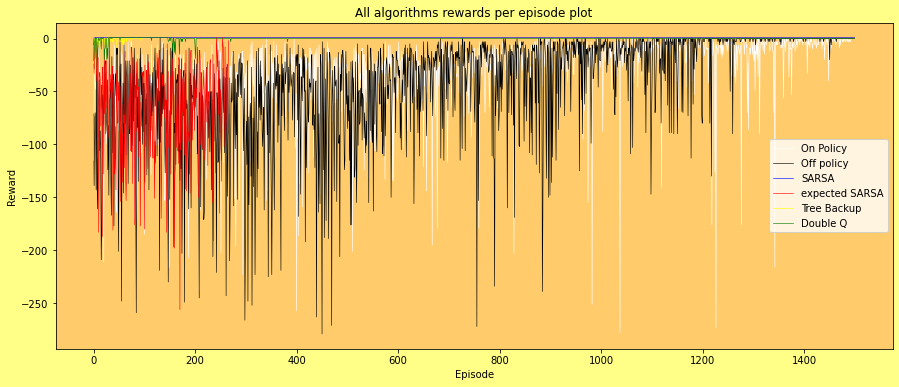

In [159]:
fig = plt.figure(figsize=(15,6))
fig.patch.set_facecolor('yellow')
fig.patch.set_alpha(0.47)
ax = fig.add_subplot(111)
ax.plot(mc.all_returns, color='white',linewidth=0.6)
ax.plot(mc_off.all_returns, color='Black',linewidth=0.6)
ax.plot(sarsa.reward_per_episode, color='Blue',linewidth=0.6)
ax.plot(e_sarsa.reward_per_episode, color='Red',linewidth=0.6)
ax.plot(TD.reward_per_episode, color='Yellow',linewidth=0.6)
ax.plot(dq.reward_per_episode, color='Green',linewidth=0.6)
ax.patch.set_facecolor('red')
ax.patch.set_alpha(0.2)
plt.title('All algorithms rewards per episode plot')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend(['On Policy','Off policy','SARSA','expected SARSA','Tree Backup','Double Q' ], loc='lowe right')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Unrecognized location 'lowe right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  app.launch_new_instance()


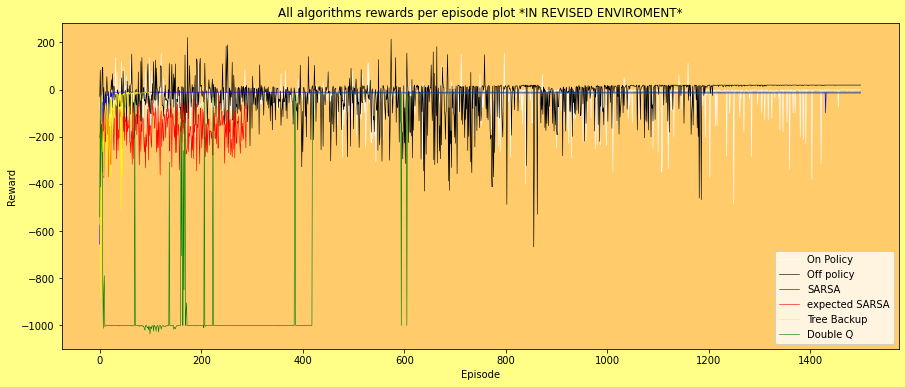

In [171]:
fig = plt.figure(figsize=(15,6))
fig.patch.set_facecolor('yellow')
fig.patch.set_alpha(0.47)
ax = fig.add_subplot(111)
ax.plot(np.array(mc_2.all_returns), color='white',linewidth=0.6)
ax.plot(np.array(mc_off_2.all_returns), color='Black',linewidth=0.6)
ax.plot(sarsa_2.reward_per_episode, color='Blue',linewidth=0.6)
ax.plot(e_sarsa_2.reward_per_episode, color='Red',linewidth=0.6)
ax.plot(TD_2.reward_per_episode, color='Yellow',linewidth=0.6)
ax.plot(dq_2.reward_per_episode, color='Green',linewidth=0.6)
ax.patch.set_facecolor('red')
ax.patch.set_alpha(0.2)
plt.title('All algorithms rewards per episode plot *IN REVISED ENVIROMENT*')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend(['On Policy','Off policy','SARSA','expected SARSA','Tree Backup','Double Q' ], loc='lowe right')
plt.show()